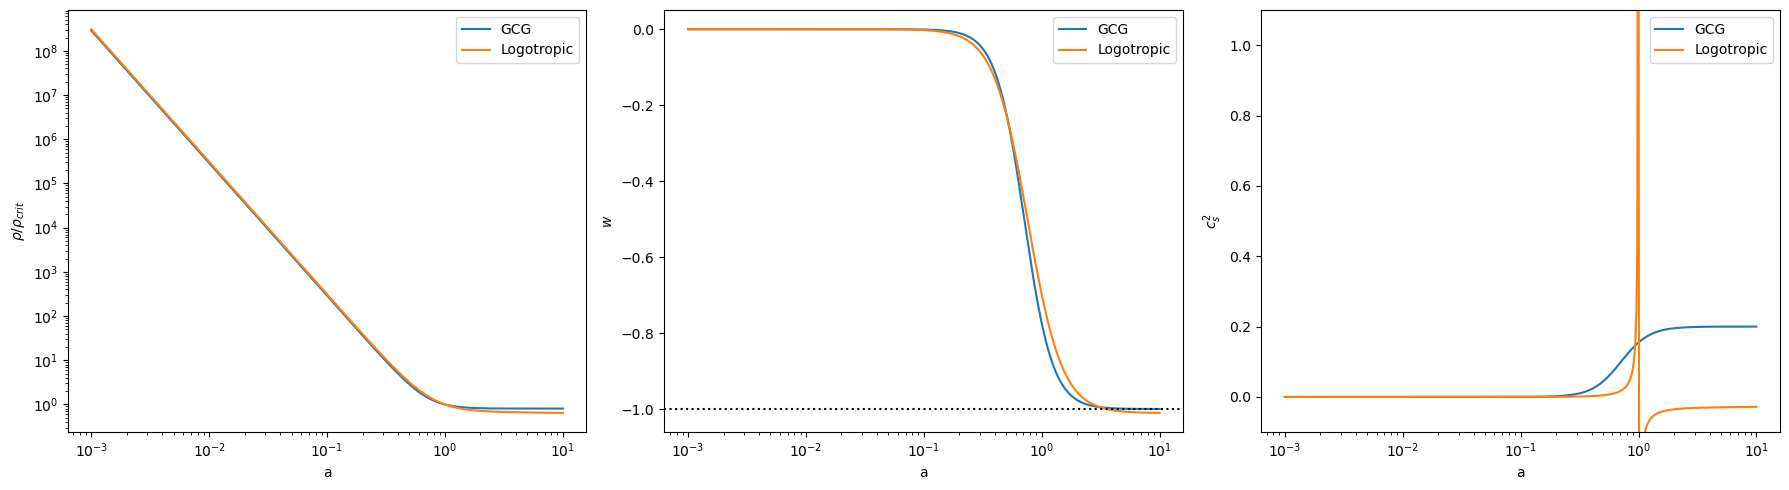

In [1]:
import sys
import os

# Adds the parent directory to the python path
sys.path.append(os.path.abspath('../'))

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from src.physics.ude_models import GCGModel, LogotropicModel, MurnaghanModel
from src.physics.cosmo_solver import CosmoSolver


# 1. Setup scale factor array
a = np.logspace(-3, 1, 500)
N = np.log(a)

# 2. Initialize Models
gcg = GCGModel(alpha=0.2)
logo = LogotropicModel(B=0.01)

# 3. Generate Data
models = {'GCG': gcg, 'Logotropic': logo}
results = {name: {'rho': [], 'w': [], 'cs2': []} for name in models}

for name, model in models.items():
    results[name]['rho'] = [model.rho_ude(ai) for ai in a]
    results[name]['w'] = [model.w_ude(ai) for ai in a]
    results[name]['cs2'] = [model.cs2(ai) for ai in a]

# 4. Plotting Comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for name in models:
    ax[0].plot(a, results[name]['rho'], label=name)
    ax[1].plot(a, results[name]['w'], label=name)
    ax[2].plot(a, results[name]['cs2'], label=name)

# Formatting
ax[0].set_ylabel(r'$\rho/\rho_{crit}$'); ax[0].set_yscale('log')
ax[1].set_ylabel(r'$w$'); ax[1].axhline(-1, color='k', ls=':')
ax[2].set_ylabel(r'$c_s^2$'); ax[2].set_ylim(-0.1, 1.1)

for i in range(3):
    ax[i].set_xlabel('a')
    ax[i].set_xscale('log')
    ax[i].legend()

plt.tight_layout()
plt.show()



<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_14967/186155679.py:23: SyntaxWarning: invalid escape sequence '\d'
  axes[0].set_title('Perturbation Growth ($\delta_m$)')


(0.01, 1.0)

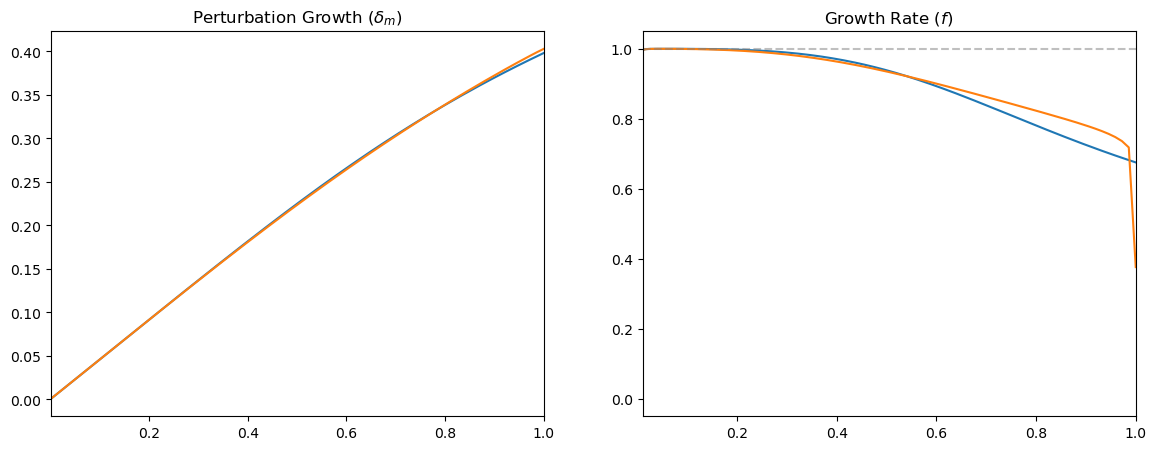

In [2]:
# Change Nend from 2 to 0 to focus on history up to today
z_LSS=1089
N_pert = np.linspace(-np.log(1 + z_LSS), 0, 500) 
a_pert = np.exp(N_pert)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for name, model in models.items():
    solver = CosmoSolver(model)
    solution = solver.solve(N_pert)
    
    delta = solution[:, 0]
    # Ensure we don't divide by zero and handle the array safely
    growth_rate = solution[:, 1] / np.where(delta == 0, 1e-10, delta)

    axes[0].plot(a_pert, delta, label=name)
    axes[1].plot(a_pert, growth_rate, label=name)

# Add a horizontal line at f=1 (Einstein-de Sitter limit)
axes[1].axhline(1, color='gray', linestyle='--', alpha=0.5, label='EdS (f=1)')

# Formatting
axes[0].set_title('Perturbation Growth ($\delta_m$)')
axes[1].set_title('Growth Rate ($f$)')
axes[0].set_xlim(1e-3, 1)
axes[1].set_xlim(1e-2, 1) # Zoom in to see the DE transition

<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:30: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_14967/2820552749.py:30: SyntaxWarning: invalid escape sequence '\d'
  axes[1,0].set_title("Density Contrast $\delta$")


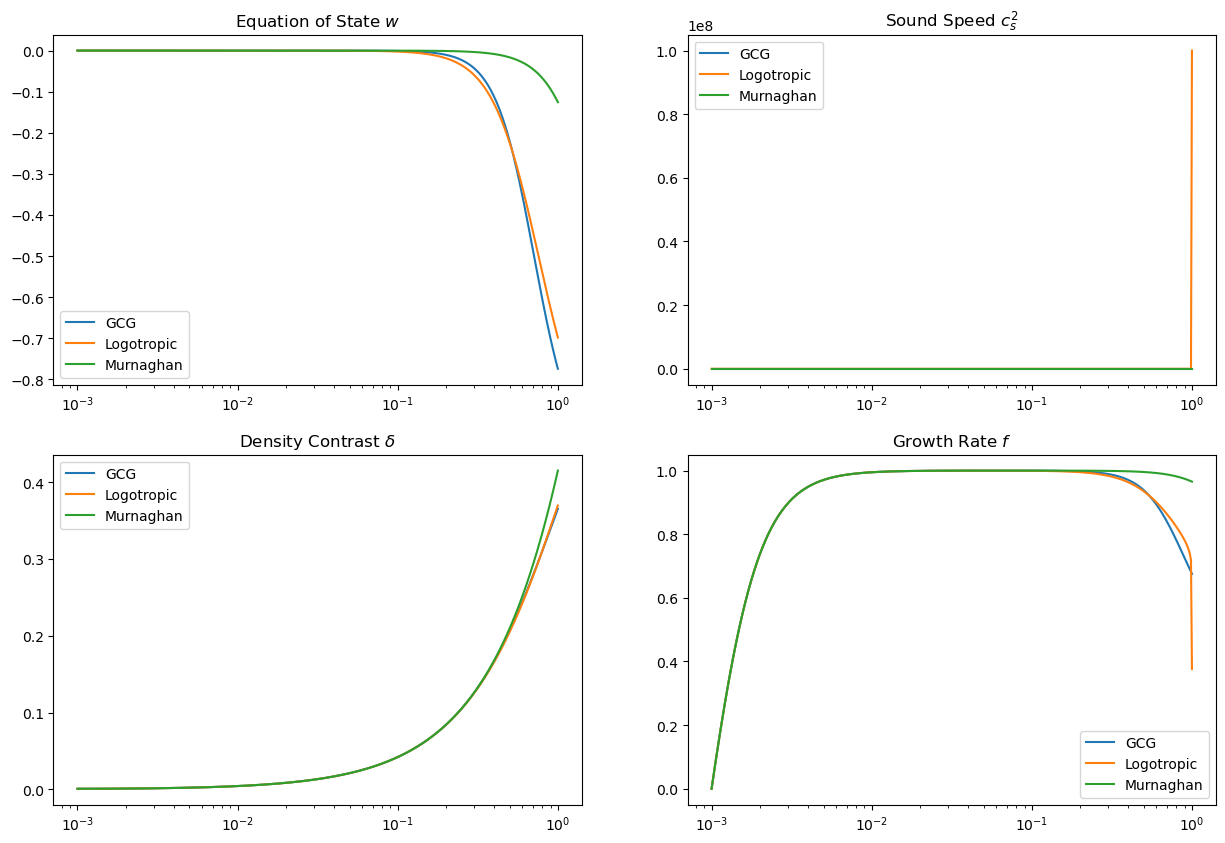

In [3]:
# In your notebook:
a_vals = np.logspace(-3, 0, 500)
models = {
    'GCG': GCGModel(alpha=0.2),
    'Logotropic': LogotropicModel(B=0.01),
    'Murnaghan': MurnaghanModel(alpha=0.03, A_star=1.07e-5)
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for name, model in models.items():
    # Background
    w = [model.w_ude(ai) for ai in a_vals]
    cs2 = [model.cs2(ai) for ai in a_vals]
    
    # Perturbations
    solver = CosmoSolver(model)
    N_pert = np.log(a_vals)
    sol = solver.solve(N_pert)
    f = sol[:, 1] / (sol[:, 0] + 1e-10)

    axes[0,0].plot(a_vals, w, label=name)
    axes[0,1].plot(a_vals, cs2, label=name)
    axes[1,0].plot(a_vals, sol[:, 0], label=name) # delta
    axes[1,1].plot(a_vals, f, label=name) # growth rate

# Aesthetics
axes[0,0].set_title("Equation of State $w$")
axes[0,1].set_title("Sound Speed $c_s^2$")
axes[1,0].set_title("Density Contrast $\delta$")
axes[1,1].set_title("Growth Rate $f$")
for ax in axes.flat:
    ax.set_xscale('log')
    ax.legend()

plt.show()